In [502]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [503]:
df = pd.read_csv('Datasets/main_data.csv')

In [504]:
df.head()

,N,P,K,pH,EC,OC,Zn,Fe,Cu,Mn,Fertility
0,132,6.4,517,7.50,0.61,0.49,0.46,5.02,0.69,7.15,0
1,264,4.8,549,7.27,0.78,1.07,0.41,4.58,0.86,8.02,0
2,276,5.5,348,7.30,0.62,0.20,0.28,5.32,0.74,2.78,1
3,207,7.2,444,7.54,0.42,0.29,0.37,8.02,1.42,11.05,0
4,295,7.2,348,7.80,0.55,0.10,0.24,6.33,1.02,3.25,1


In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          800 non-null    int64  
 1   P          800 non-null    float64
 2   K          800 non-null    int64  
 3   pH         800 non-null    float64
 4   EC         800 non-null    float64
 5   OC         800 non-null    float64
 6   Zn         800 non-null    float64
 7   Fe         800 non-null    float64
 8   Cu         800 non-null    float64
 9   Mn         800 non-null    float64
 10  Fertility  800 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 68.9 KB


In [506]:
df[df['Fertility'] == 0].shape

(300, 11)

In [507]:
df[df['Fertility'] == 1].shape

(500, 11)

<Axes: >

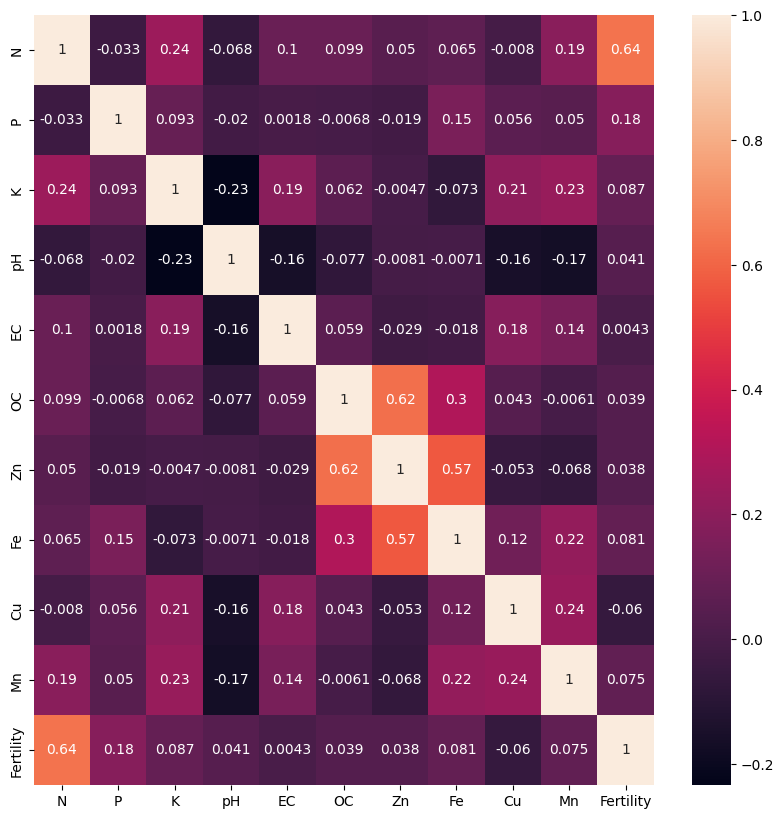

In [508]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True)

Train Test Split

In [509]:
from sklearn.model_selection import train_test_split

In [510]:
X=df.drop('Fertility', axis=1)

In [511]:
y=df['Fertility']

In [512]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Implementing Naive Bayes Classifier without any OverSampling and UnderSampling Techniques

In [513]:
from sklearn.naive_bayes import GaussianNB

In [514]:
classifier = GaussianNB()

In [515]:
classifier.fit(X_train,y_train)

GaussianNB()

In [516]:
y_pred = classifier.predict(X_test)

Checking the metrices

In [517]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [518]:
accuracy_score(y_pred,y_test)

0.5375

In [519]:
confusion_matrix(y_pred,y_test)

array([[ 81, 104],
       [  7,  48]])

In [520]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.44      0.59       185
           1       0.32      0.87      0.46        55

    accuracy                           0.54       240
   macro avg       0.62      0.66      0.53       240
weighted avg       0.78      0.54      0.56       240



Now OverSampling with the help of Smote and then training the model

In [521]:
from imblearn.over_sampling import SMOTE

In [522]:
smote = SMOTE()

In [523]:
X.shape

(800, 10)

In [524]:
y.shape

(800,)

In [525]:
X_smote,y_smote = smote.fit_resample(df[['N','P','K','pH','EC','OC','Zn','Fe','Cu','Mn']], df['Fertility'])

In [526]:
X_smote.shape

(1000, 10)

In [527]:
y_smote.shape

(1000,)

In [570]:
y_smote[y_smote == 0].shape

(500,)

In [571]:
y_smote[y_smote == 1].shape

(500,)

Now Train Test Split after applying SMOTE

In [530]:
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.3,random_state=42)

In [531]:
classifier.fit(X_train,y_train)

GaussianNB()

In [532]:
y_smote_pred = classifier.predict(X_test)

Checking The Metrics after oversampling with somte

In [533]:
accuracy_score(y_smote_pred,y_test)

0.6133333333333333

In [534]:
confusion_matrix(y_smote_pred,y_test)

array([[134, 107],
       [  9,  50]])

In [535]:
print(classification_report(y_smote_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.56      0.70       241
           1       0.32      0.85      0.46        59

    accuracy                           0.61       300
   macro avg       0.63      0.70      0.58       300
weighted avg       0.82      0.61      0.65       300



Now applying NCR UnderSampling

In [536]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

In [537]:
ncr = NeighbourhoodCleaningRule(n_neighbors = 5)

In [538]:
X.shape

(800, 10)

In [539]:
y.shape

(800,)

In [540]:
X_ncr,y_ncr = ncr.fit_resample(df[['N','P','K','pH','EC','OC','Zn','Fe','Cu','Mn']], df['Fertility'])

In [541]:
X_ncr.shape

(686, 10)

In [542]:
y_ncr.shape

(686,)

Train test split after applying NCR

In [543]:
X_train,X_test,y_train,y_test=train_test_split(X_ncr,y_ncr,test_size=0.3,random_state=42)

Now training and testing gausian naive bayes

In [544]:
classifier.fit(X_ncr,y_ncr)

GaussianNB()

In [545]:
y_pred_ncr = classifier.predict(X_test)

Now Checking the metrics

In [546]:
accuracy_score(y_pred_ncr, y_test)

0.587378640776699

In [547]:
confusion_matrix(y_pred_ncr, y_test)

array([[89, 85],
       [ 0, 32]])

In [548]:
print(classification_report(y_pred_ncr, y_test))

              precision    recall  f1-score   support

           0       1.00      0.51      0.68       174
           1       0.27      1.00      0.43        32

    accuracy                           0.59       206
   macro avg       0.64      0.76      0.55       206
weighted avg       0.89      0.59      0.64       206



In [549]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [550]:
tree_classifier = DecisionTreeClassifier()

In [551]:
parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[3,4,5,6,7,8,9,10],
    'splitter':['best','random']
}

In [552]:
tune = GridSearchCV(estimator=tree_classifier,param_grid=parameters, cv =5)

In [553]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [554]:
X_train.shape

(560, 10)

In [555]:
X_test.shape

(240, 10)

In [556]:
tune.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [557]:
tune.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}

In [558]:
tree_classifier = DecisionTreeClassifier(criterion='log_loss',max_depth=6,splitter='random')

In [559]:
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=6, splitter='random')

In [560]:
y_pred_tree = tree_classifier.predict(X_test)

In [561]:
accuracy_score(y_pred_tree,y_test)

0.9

In [562]:
confusion_matrix(y_pred_tree,y_test)

array([[ 69,   5],
       [ 19, 147]])

In [563]:
print(classification_report(y_pred_tree,y_test))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        74
           1       0.97      0.89      0.92       166

    accuracy                           0.90       240
   macro avg       0.88      0.91      0.89       240
weighted avg       0.91      0.90      0.90       240



In [564]:
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.3,random_state=42)

In [565]:
tree_classifier.fit(X_smote,y_smote)

DecisionTreeClassifier(criterion='log_loss', max_depth=6, splitter='random')

In [566]:
X_smote.shape

(1000, 10)

In [572]:
y_smote[y_smote == 0].shape

(500,)

In [573]:
y_smote[y_smote == 1].shape

(500,)

In [574]:
y_pred_tree_smote = tree_classifier.predict(X_test)

In [575]:
accuracy_score(y_pred_tree_smote,y_test)

0.9566666666666667

In [576]:
confusion_matrix(y_pred_tree_smote,y_test)

array([[137,   7],
       [  6, 150]])

In [577]:
print(classification_report(y_pred_tree_smote,y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       144
           1       0.96      0.96      0.96       156

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

